In [53]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(2)

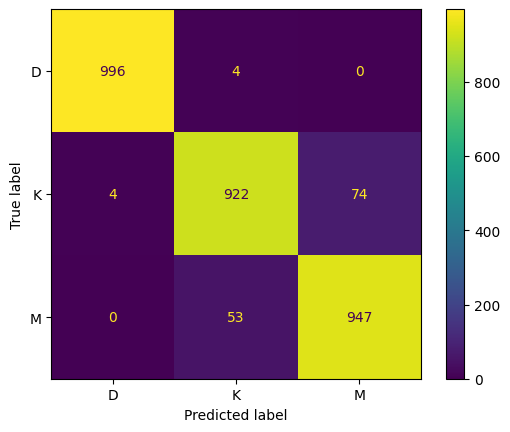

In [54]:
k = 20 # change here


m1 = 1000
m2 = 1000
m3 = 1000

X1 = np.random.normal(-6, 1, m1)
X2 = np.random.normal(0, 1, m2)
X3 = np.random.normal(3, 1, m3)
X = np.concatenate((X1, X2, X3))
Y = 0.33*norm.pdf(X,-6,1) + 0.33*norm.pdf(X, 0, 1) + 0.33*norm.pdf(X, 3, 1)
y_true = [0 for _ in range(m1)] + [1 for _ in range(m2)] + [2 for _ in range(m3)]



knn = KNeighborsClassifier(n_neighbors=k)
X_reshaped = X.reshape(-1, 1)
knn.fit(X_reshaped, y_true)
y_pred = knn.predict(X_reshaped)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['D', 'K', 'M'])
disp.plot()

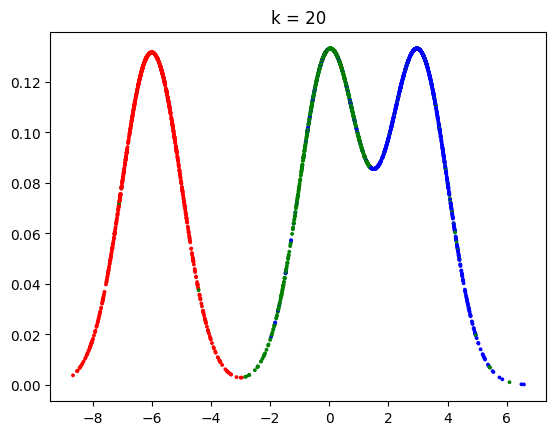

In [55]:
colormap = ['red', 'green', 'blue']
colors = [colormap[i] for i in y_pred]
comp = sorted(list(zip(X, Y)), key=lambda x: x[0])
X, Y = zip(*comp)
plt.title(f'k = {k}')
plt.scatter(X, Y, s=3, c=colors)